In [2]:
#get to know your data
import pandas as pd
df=pd.read_csv('advertising.csv')
print('Shape: ',df.shape)
df.head()

Shape:  (200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [72]:
#total sales in each category
df.sum()

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

In [107]:
print("Total unit sales : 3026.1\n"
"Total Radio sales : 4652.8\n"
"Total Newspaper sales : 6110.8\n"
"Total TV sales : 29408.5\n")

Total unit sales : 3026.1
Total Radio sales : 4652.8
Total Newspaper sales : 6110.8
Total TV sales : 29408.5



Text(0, 0.5, 'Sales')

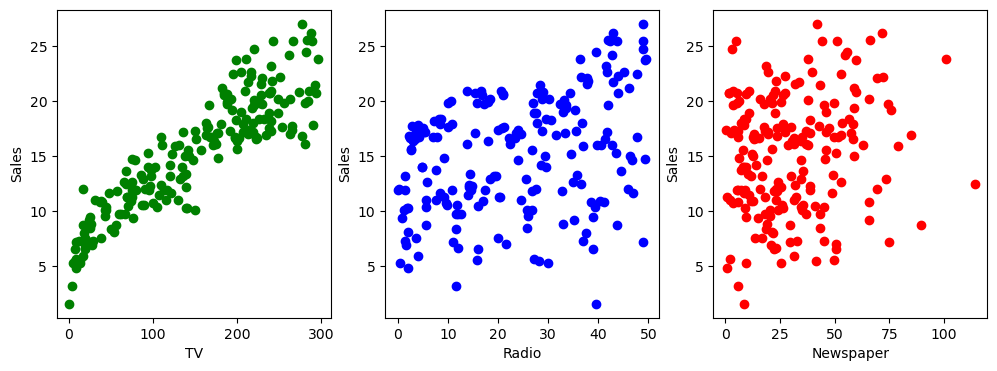

In [41]:
#plots for each category versus sales
import matplotlib.pyplot as plt
%matplotlib inline

a,(b,c,d)=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
b.scatter(df.TV,df.Sales,color='green')
b.set_xlabel('TV')
b.set_ylabel('Sales')
c.scatter(df.Radio,df.Sales,color='b')
c.set_xlabel('Radio')
c.set_ylabel('Sales')
d.scatter(df.Newspaper,df.Sales,color='red')
d.set_xlabel('Newspaper')
d.set_ylabel('Sales')

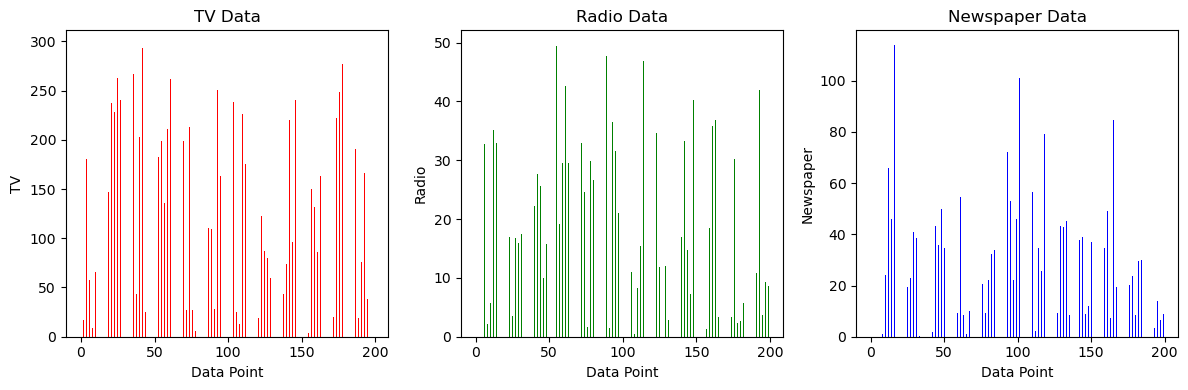

In [44]:
fig, (a,b,c) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
width = 0.2
x = df.index
a.bar(x - width, df.TV, width=width, label='TV', color='red')
a.set_xlabel('Data Point')
a.set_ylabel('TV')
a.set_title('TV Data')

b.bar(x, df.Radio, width=width, label='Radio', color='green')
b.set_xlabel('Data Point')
b.set_ylabel('Radio')
b.set_title('Radio Data')

c.bar(x + width, df.Newspaper, width=width, label='Newspaper', color='blue')
c.set_xlabel('Data Point')
c.set_ylabel('Newspaper')
c.set_title('Newspaper Data')

plt.tight_layout()
plt.show()

In [45]:
#measuring asymmetry in the data
df.skew().sort_values(ascending=False)

Newspaper    0.894720
Radio        0.094175
TV          -0.069853
Sales       -0.073739
dtype: float64

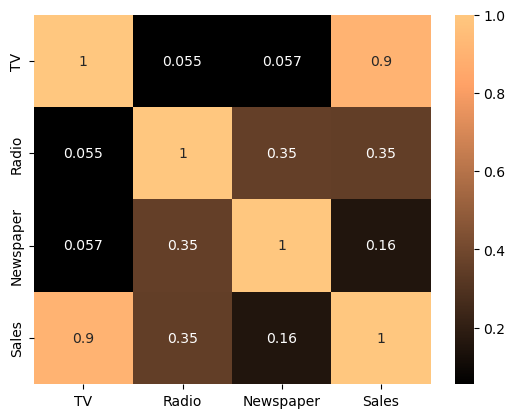

In [51]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="copper", annot = True)
plt.show()

In [53]:
#data is split into training and testing data
x=df[['TV','Radio','Newspaper']]
y=df.Sales
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)

(150, 3)
(50, 3)


In [57]:
#Multi variable linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
pred_y=model.predict(x_test)
pred_y

array([19.59277505, 15.18750828, 18.32845832, 13.24132061,  8.94645419,
       18.15533693, 12.46428308, 10.94922011, 17.45520245, 21.30681928,
       23.12985748, 19.02890392,  9.75156653, 10.5849295 ,  9.3789058 ,
       12.38801763, 16.54507792, 14.67361577, 21.05397098, 12.58439428,
       19.47411733, 21.27635947, 20.40543926, 14.46508769, 13.7087589 ,
        9.39769313, 20.99192602,  7.75230841, 18.77682515, 16.53482036,
       13.71198558, 12.84797489, 16.76640698, 18.86944944, 24.56351437,
       19.18953816,  6.37928227,  8.21607042, 17.03845626, 11.76773451,
       21.44665117,  6.05082406,  8.8391422 ,  8.09887084, 12.14053715,
       12.1202863 ,  8.06913926, 15.53421131,  9.54870002, 15.62598748])

On testing values


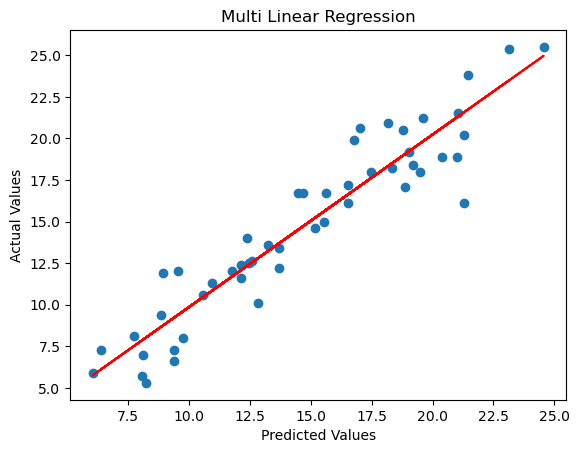

In [101]:
print('On testing values')
import numpy as np
slope, intercept = np.polyfit(pred_y, y_test, 1)
plt.scatter(pred_y, y_test)
plt.plot(pred_y, slope * pred_y + intercept, color='red')

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title('Multi Linear Regression')
plt.show()

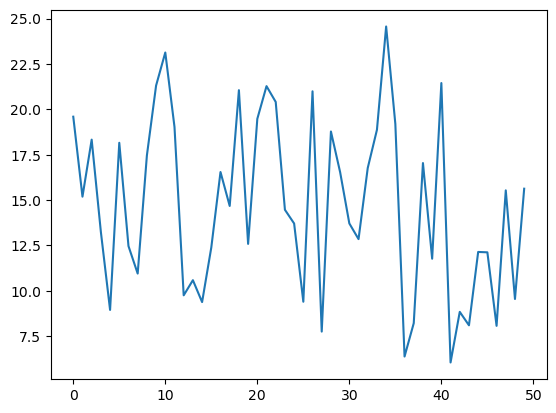

In [71]:
plt.plot(pred_y)
plt.show()

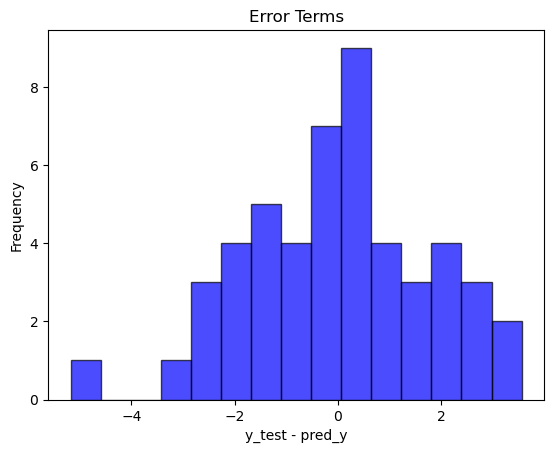

In [108]:
#visualising error term
res = y_test - pred_y
plt.hist(res, bins=15, color='blue', alpha=0.7, edgecolor='black')
plt.title('Error Terms')
plt.xlabel('y_test - pred_y')
plt.ylabel('Frequency')
plt.show()

In [109]:
#3 slopes for 3 variables
m=model.coef_
print('Slopes are ',m)

Slopes are  [0.05366561 0.10981576 0.00156513]


In [110]:
c=model.intercept_
print('intercept is ',c)

intercept is  4.628072732877632


In [111]:
score_test=model.score(x_test,y_test)
print('Score on testing is ',score_test)
score_train=model.score(x_train,y_train)
print('Score on training is ',score_train)

Score on testing is  0.8861373871007052
Score on training is  0.9075436096026824
